In [ ]:
from pyannote.audio import Pipeline

# Replace 'YOUR_AUTH_TOKEN' with your Hugging Face access token
auth_token = "YOUR_AUTH_TOKEN"

# Load the pre-trained pyannote.audio pipeline for speech activity detection
pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization", use_auth_token=auth_token)

# Path to the audio file
audio_file = "../data/speaker_diarization/speech_mix_1.wav"

# Apply the pipeline to the audio file
segmentation = pipeline(audio_file)

# Print speech vs non-speech timestamps
print("Speech vs Non-Speech Timestamps:")
for segment, track, label in segmentation.itertracks(yield_label=True):
    print(f"Start: {segment.start:.2f}s, End: {segment.end:.2f}s, Label: {label}")

Expected Sample Rate: 16000
Resampled Audio Sample Rate: 16000
Speech Segments: tensor([[0.0000, 2.7900],
        [3.4900, 6.1100]])


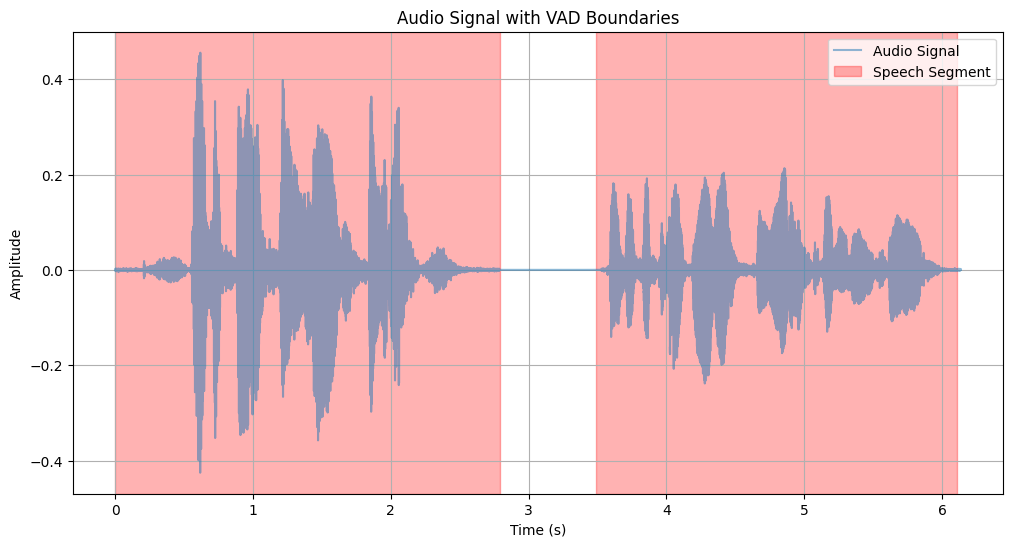

In [24]:
from speechbrain.pretrained import VAD
import librosa
import soundfile as sf

# Load pre-trained Voice Activity Detection (VAD) model
vad = VAD.from_hparams(source="speechbrain/vad-crdnn-libriparty", savedir="tmpdir")

# Path to the audio file
audio_file = "../data/speaker_diarization/speech_mix_1.wav"

# Check the sample rate expected by the VAD model
expected_sample_rate = vad.sample_rate
print("Expected Sample Rate:", expected_sample_rate)

# Load the audio file and resample it to the expected sample rate
audio, sr = librosa.load(audio_file, sr=expected_sample_rate)
print("Resampled Audio Sample Rate:", sr)

# Save the resampled audio to a temporary file
resampled_audio_file = "../output/resampled_audio.wav"
sf.write(resampled_audio_file, audio, sr)

# Perform VAD on the resampled audio file
boundaries = vad.get_speech_segments(resampled_audio_file)
print("Speech Segments:", boundaries)

# Plot all the VAD boundaries using line segments overlay on the waveform
import matplotlib.pyplot as plt
import numpy as np

def plot_vad_boundaries(audio, sr, boundaries):
    plt.figure(figsize=(12, 6))
    times = np.arange(len(audio)) / sr
    plt.plot(times, audio, label='Audio Signal', alpha=0.5)

    # Highlight speech segments with shaded regions
    for start, end in boundaries:
        plt.axvspan(start, end, color='red', alpha=0.3, label='Speech Segment' if start == boundaries[0][0] else "")

    plt.title('Audio Signal with VAD Boundaries')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    plt.show()

# Plot the audio with VAD boundaries
plot_vad_boundaries(audio, sr, boundaries)